In [1]:
# Importing modules
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from typing import List, Tuple
from collections import Counter
import itertools
import scipy.linalg as la
import random
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [2]:
# Set the default font to be LaTeX compliant.
plt.rcParams["font.family"] = "serif"
plt.rcParams["font.serif"] = "Computer Modern Roman"
plt.rcParams["text.usetex"] = True

# Set a global font size.
font_size = 11
plt.rcParams["font.size"] = font_size
plt.rcParams["axes.labelsize"] = font_size
plt.rcParams["xtick.labelsize"] = font_size
plt.rcParams["ytick.labelsize"] = font_size
plt.rcParams["legend.fontsize"] = 11

In [3]:
"""
Optimized initial param: [-0.1905552652709773, 0.826794103836818, 0.46070580602994465, 0.6392358203516043, 0.3737297834537639, 1.3863850134758444, 2.250054174817082, 2.2865799821453674, 1.8474350275028557, 2.943849885613736, 2.937138815635332, 5.824687857889466, 4.833659142077338, 4.8321537804203105, 6.298435981295715, 6.031154285939176, 6.258642982220881, 6.323324072273103, 7.965894501049475, 7.936368982793427, 8.048430302004391, 8.199950372072166, 7.828062399597146, 8.292753596778761, 7.8930727990317795, 7.888279549218078, 7.6045272406463695, 9.496205641313086, 9.454127211750453, 10.413402583552637, 0.22569812909520184, 0.48641565909210677, -0.7347959932523311, 0.3952094207349838, 0.2488081170866201, 0.17212333004048272, 0.25385884530710523, 0.370358878031941, -0.05141341152889512, -0.3554979332165541, 0.4413456430694285, 0.9739348511408338, 0.09112184118402498, -0.2195571037111155, -0.24885787557093925, 1.25962475117881, 0.6114251729475919, -0.5335937262795726, 0.04943246137066318, 0.005484971626473549, 1.3104519244293609, 0.4979092978698511, 0.6416458820246012, 0.21745308014166737, -0.4087114989462187, 0.7891607170365741, -0.617307203388439, 0.5508392798207058, 0.2172802973577226, -0.4573394962623111, -0.0050937336789654555, 0.012756993518654275, 0.2433747926836423, -0.09667575788554163, 1.4637433645631337, -0.06289467544555442, 1.4916950042291584, -0.006070576246503756, 0.4972708401155018, 0.3500696628808235, 0.3090441500381426, -0.18398087161628715, 0.25294523690150417, 0.002209167298241761, 0.052993848080851405, 1.5200539716225385, 0.7220192884277282, -1.5778765603713818, 1.2703020062674948, -0.012160203192065448, 1.22148329375021, 0.10129048132597196, -0.24018820905538957, -0.7982944411314258, 1.4568543872815272, 0.00567834863444804, 1.7857179220541524, -0.021236893921148005, 0.238635330266315, -0.6394478049628457, 0.9303530487609107, -0.1917019258512929, 0.07475468891883241, 0.5151191015706935, 0.5026497785303128, 0.10599558689869029, 0.09366670649989686, 0.1803790887157558, 0.7025275733243503, -0.6911746028059659, -1.683518798897433, 0.1514002923688494, -0.12075592266189339, 0.16776553008486178, 0.26517329186774036, -0.22184163626338582, -0.5181566475852698, -0.9551047287095813, 0.3730094838479896, -0.5305471008201765, -0.3505401465066764, -0.3330804497769812, 0.21933758186142588, 0.39863755005643786, -0.33624750990583624, 0.10769758829673662, -1.2440495637283397, 0.4416448082177237, 0.3897962418451306, -1.4539889313580125, 0.26162930124393535, 1.380872341663681, -0.7081306907602561, 1.1992876667274268, 0.4672020284630833, -1.5597296421217155, 1.1394567665208701, -0.17848499359963724, -0.5253351276276002, -0.23315061520778121, 1.2368970931175618, -0.14563883950110412, -0.015738251857892373, 0.17611840813575994, 0.25857093157906397, 1.3664076396513827, 0.9027013210275531, 1.3169468495232761, 0.8824269540274331, 0.021183571150599403, -1.0809655505819549, 0.04940708552054079, -0.5573220990007957, 1.9196539329487328, -1.0755801879074567, -0.02246857801752695, -0.43739432222706726, 1.579055801326704, -0.6034835615150992, 1.6360138823861403]
"""
zne_n1_sample1 = [{'degree': 1, 'value': -7.824438860763138}, {'degree': 2, 'value': -7.990657584106635}, {'degree': 3, 'value': -7.904017573828122}, {'degree': 4, 'value': -7.821263469237616}, {'degree': 5, 'value': -7.8262144464080325}]


"""
Optimized initial param: [-0.882465094230846, -0.8645509115206389, 1.0860109437351608, 1.6054813659950702, 0.7522686983728198, 2.9709436020938904, 2.7944041033249336, 4.341610711058741, 3.11717978427347, 3.021626655372605, 4.071698459470531, 3.28219643064421, 7.382343633481017, 3.1559241595895857, 7.230817613333765, 3.172005225800061, 7.435970697803745, 4.29826831633019, 7.322838547922418, 5.099416423107285, 5.723686164843414, 5.780364875418835, 4.668046460800838, 8.9180588020338, 8.167528173276517, 8.534717375182035, 8.195220769597734, 9.057554891801345, 8.83973832409068, 9.348483185845945, -0.4018546981531649, -0.43801819832307776, -0.5059778495177807, -2.0862023751646297, 0.7230132131638977, 1.1617336587753504, -2.564865312536094, -1.4358316056700584, -0.18403923856738597, -0.5399269758719245, -0.5947726326399706, -0.6171222619002525, 0.8587750501832484, 0.5033670712495844, -0.8433325751789906, 1.342731842670648, -0.3413428052799698, -0.6133088523076325, -0.40430134563157893, 0.8163401279004997, 0.9018275067782539, 0.504948980743736, 0.43480773816050844, -0.7978597441250942, 0.3577475243942066, 1.2726944266349545, 0.2765551986178938, 0.3438378598711977, 0.007034275173737247, 1.073004201562374, -0.5207985992705431, 1.5918098793658504, 0.23957229467023192, -0.12659621600929416, -1.507666021219773, 0.08815310074283293, -1.0842967717700016, 1.8510910761063004, 0.32017270612286886, 0.14494354360948197, -0.7252400350931563, -1.162507633903739, -0.9799149106579834, 1.7233996172781525, 1.5566198545987533, 0.48068249232855564, -0.21059314799648812, -0.6134418178056319, -0.011309046961177013, 0.11218840027386663, -0.16422368633479661, 0.3008683626598558, 1.213010093975306, -0.062100413496431514, 0.08680614372120268, -0.04784579598158403, 0.04453566296687276, -0.12286168269258413, -0.23690966988864903, -0.1907088057758951, -0.15078502484559933, 0.26990633839012945, -0.8571748349218307, 0.03210619357385409, -0.8940834060497337, -0.2495658419662431, -0.40981028560427757, -0.12399517198454335, -1.4113389153802556, 1.5895882960105985, 0.5322407397512738, -1.1765592970715189, -0.562681563867497, -0.7242301154820292, 0.6731411028772556, 0.6910498219235837, -0.014474586414535046, -0.3664951876931189, -0.979635631075178, -0.8128715367718213, 0.23724931880781924, 0.16317779842078756, -0.6738176709184767, 0.02323509091502205, 0.6034273469288798, 0.9477424245573578, 0.06577859130646897, 0.36212648256981556, 0.01104349390362725, -1.4684617336348942, 0.5160352269971513, -0.05275765125572769, -0.30670955462232663, -0.02153638235676779, -1.3296822878586756, 0.10923359321528262, 1.0873206012013057, 0.5126593415672972, -0.3942360265597979, 1.4791364252612569, -0.4656823510630386, 0.5264090539498946, -0.1427820676064485, 1.442379810561404, 0.5979880706787455, -0.4285830493191033, -0.28814840980085216, -1.8687918938526926, 0.15030389877061756, -0.7524378833013069, 1.189733815521572, 1.2440203652270894, 0.4074217812388962, -0.1803184355258296, 1.8039869820643795, -0.36214975184329706, -0.8585950156372361, 0.1349815535789973, 0.6031996012550936, 0.6315974692637817]
"""
zne_n1_sample2 = [{'degree': 1, 'value': -7.590330319315242}, {'degree': 2, 'value': -7.853626486583993}, {'degree': 3, 'value': -7.776437820063285}, {'degree': 4, 'value': -7.631911280382146}, {'degree': 5, 'value': -7.536361615971538}]

"""
Optimized initial param:  [0.8810378443023272, 3.2432027488176995, -1.7464489227149398, 3.025928394915788, 1.37704355351849, 3.9464360641302485, 2.461897037951229, 2.6694792595230346, 3.3351556721729865, 2.425922721211436, 4.9094898280039745, 5.269355250195088, 5.39725676268804, 4.77163537544283, 4.813093207169645, 4.807940370126196, 4.779287841675169, 5.204777281605053, 5.209300728774963, 6.415941710136795, 6.29243931464094, 7.238128898342907, 7.03830214795612, 8.043292096023785, 8.234695775815503, 7.137873519743199, 8.244389235263935, 8.09006913919833, 10.143515203107501, 10.077684464758244, 0.5563389978402653, 0.07890094122066384, 0.05012765174369656, 0.7133323086712025, -0.3481037085552651, -0.22719401711967852, -0.47253106079440704, 0.7384227425483129, -1.509791833610275, 1.562316966627491, -1.7196027826602365, -1.558711719385527, 1.112609022873296, -0.7754432001829892, 0.8849020666138772, 0.8625098131694622, -0.5724669425039184, -1.541850538288632, 1.0028466594973, 1.5777661770653704, -0.42585152337287674, -0.1994656903234961, -1.976291884079974, 0.06607482201311977, 0.8516117060346567, 0.20734440595775824, 0.6705250985541452, -0.4690874596546756, 0.41246899632110867, 0.24657733166256268, -0.4472647246893409, 0.6843516503557089, -0.24521515992279133, -0.4466778261288879, -0.26493671978511635, 0.6115326501151562, -0.32462896123529666, -0.2002446934637805, 1.2987119618252108, -0.17735763715612013, -0.34812328480503096, 1.0760202535370709, -1.2662247411276732, 0.5964350369137785, 0.034918120141182216, 1.0673452115464719, -0.4031476168558636, -1.1191268561681231, 0.17662307376672293, 0.49697306676884967, 1.0252097858428946, -1.2216464878907796, 0.568608909183067, 2.3909193016103116, -0.441014372173678, -1.0879517227308277, 0.312230064798464, 0.44611853825939785, 0.18976538714763017, -0.884577116275802, -0.8511262232617391, 0.5966622031604649, 0.2988373949531531, -0.5269750739548312, -0.42532616230815745, -1.0618259493122988, -0.6161668263277457, 0.48527056494504434, -1.20352148517947, -0.2227917093472367, 0.7227485904579989, 0.7765119818903296, -0.8536588197758849, -0.9208753521363271, -1.0405152527921457, -0.3193816887403193, -0.6966040809551519, -0.053464060287472526, 0.03849832383504922, -1.2659078993224446, -0.31072729020286094, -2.0719888491632514, -0.3270320587826639, 0.08466206306156875, 0.02034565545781294, 0.07598005552738243, -2.965181258196133, -0.5871755432157296, 0.9034405316673095, -0.11371301045923828, -0.17541561537806652, -0.20564852765453848, 0.6906772341652335, -0.08836091557862272, 0.2814855985669449, 0.5207103731360025, 0.21263189227372856, 0.5596531247805979, 0.7503734151275305, -0.1355040530636924, -0.5944180776809941, -1.2310494724841918, -0.05722692530715202, 1.4260062214779219, 2.286848219475498, -0.3007991968594094, -1.157980435583257, 1.4842483258870653, -0.42603789801415626, -0.4477152292871858, -0.3882462914249121, -0.017803090590447698, 0.4647173313961297, 0.0014343074817486654, 0.5287448956285122, 0.8372662032358453, 1.3821942098827706, 0.7796291868769865, 0.8356753978414101, 0.0007885449993668256]
"""
zne_n1_sample3 = [{'degree': 1, 'value': -7.643380178456389}, {'degree': 2, 'value': -7.856457717029071}, {'degree': 3, 'value': -7.778198651010734}, {'degree': 4, 'value': -7.670602616474287}, {'degree': 5, 'value': -7.630933184544967}]

"""
Optimized initial param:  [-0.10572770090275874, 2.107516102414744, 0.20473667030360174, 3.072303898140876, 1.2243533039082681, 2.690928955733278, 3.3673035190160205, 2.5266900308767144, 4.493698840264657, 1.9962036965206968, 3.8653314842150994, 3.2354796357420628, 3.3443767561146527, 4.661541008837386, 3.6570428933044554, 7.478253862514411, 4.446116430469777, 7.374777199485636, 5.944339086866294, 6.811297282994174, 7.244777100055931, 6.908526679222247, 6.69677055439519, 7.577279829594161, 7.451165369678547, 9.813530512600913, 9.759657584879346, 8.953805033541938, 9.240719602461153, 9.075021690811894, -0.5777532787947016, 0.5173871731732346, 0.7894500950240146, -1.874244861850158, -0.6131598979421901, 0.33335060630184155, 0.7651866730142997, 0.04051305472456692, 0.054266228051976784, 0.455690937610337, -0.28850192566470517, 0.39472440953223964, -0.12668187671247952, 0.3765272321574518, 0.3804251368970216, 0.8945347604135693, 0.7578754701919077, -0.1795466245074687, 0.4261189786990336, 0.04477805759515881, -0.2835622000446977, -0.244974135959296, 0.25891048387029936, 0.329114617185064, -1.3002593128363127, 1.201811897246172, -0.16371362761380778, -0.45419278147625697, -0.49883413817234673, 0.41050122517903026, 0.046394923048283215, -0.19510941592721504, 0.10926315553592962, 0.46594118871673346, 1.376893901172081, 0.3405031952535605, 0.28687617394398485, 0.9332916019416168, -0.289048010772304, 1.0568655222355374, -0.5078743822112161, 0.10292434095404132, -0.221647473253474, -0.31855808824601123, -0.8102400880943521, -0.07934693318086838, 0.1111319126900448, -0.2867843389835783, -0.5483329892131307, -0.09532149330211456, 0.8417756330379513, 0.4797921524048801, -0.771904912182542, -0.7239971133106261, 0.9700699199598971, -0.305949771905098, -1.496807659052277, 0.17665996332454917, 1.177588041780947, 1.013805046306279, 0.32809294741621353, 0.018501193893471976, 0.0007462231557265903, -0.44309566788953586, -1.1151968301639188, 1.1167673019013542, 0.20026636574288834, -0.06538255066693174, 0.8558792013916254, -0.5195414302477352, -0.5323722824972933, 0.12302120320484691, -0.25711770202900974, -0.8356730237475131, 1.1522613878200878, 1.0218783561485885, 0.9821394152605257, 0.11511028940175091, -0.6685195252693544, 0.027230600261273254, -0.07613766481996795, 0.03494343183766694, -1.2948165849416888, 0.1715119666878659, 0.3419349834108774, -0.689815749186361, 0.01571070336629073, -0.14459760853251144, -0.12484761113819016, -0.1469175226971337, -0.8273596263574239, 0.09983078831560023, -0.7595468805087049, 0.42716880341032404, -1.16964193145905, 0.7290481220398283, -0.4725793171267325, 1.0101106084997502, -0.3734108991267753, -0.34183877285543074, 0.2123092446955044, -0.13719777449467685, -0.03261318982956805, 0.3251897534710002, -1.7478541700658217, 0.597005861366637, 0.45941844786186964, -0.027777408433345908, 0.16566368901059514, 1.3823301666056471, -0.039691309380294776, 1.479097255883323, -0.46654205106151614, 0.10570410471262809, 0.2063188932504551, 0.45854369661763794, -0.5370542870897511, 0.8090966882716036, 1.3512976334786935, 0.07994379856212408]
"""
zne_n1_sample4 = [{'degree': 1, 'value': -7.652217485829845}, {'degree': 2, 'value': -7.906590063308366}, {'degree': 3, 'value': -7.831392041618267}, {'degree': 4, 'value': -7.69862098595681}, {'degree': 5, 'value': -7.620299916572267}]

"""
Optimized initial param:  [0.09747496497248141, 0.9390729608931822, 0.819482057536826, 1.9652347809910085, 0.5683497641484944, 2.715164821782805, 2.395610645508512, 2.712563907858427, 5.171747713199911, 3.140056261481164, 4.356241417865319, 3.3804891804083548, 5.167766097680845, 5.022429805115318, 7.2879787941190095, 7.274091236421508, 6.768980281220063, 8.492882344500904, 8.486021047422357, 9.22575795802233, 7.7455706915937395, 7.767947649267914, 7.207001352094566, 8.673321634448902, 8.65861124443352, 9.207871714468562, 8.787977081928332, 8.822383798920017, 8.729950439445595, 8.924676848688273, -0.09450789581454645, 0.5439620564617209, 0.7161376510182995, -0.4028469714914429, -0.40219780926848087, -0.5899709452325471, -0.13523759786583453, 0.18464159948849806, -0.565717424051232, 0.5047345750763496, 0.11189467466565944, -0.5336593903358914, -0.7175674197637779, -1.1129728672886907, -0.8974499574721101, 1.5721918231685337, 0.30347576381194696, -0.4680523618590693, -0.34099961204065726, 0.05051677412209326, 0.9867333536670828, -0.03403516332896031, 0.955572482534813, 0.2063535125865792, -1.244558081439682, -0.146872169261084, 0.48548767061782677, -0.2600569642342921, 0.6055601878407488, -0.01068855080300649, 0.7762320618565419, 0.7590908089442102, 0.6362683123062387, -1.5878354219286608, -0.6031993638743669, -1.1346330214358602, -0.44974110779242754, -0.17825426119418278, 0.09222435050191126, -0.8853921314974842, -0.8042507842926071, -0.1554324410244015, 0.13232880122819707, 0.601551833499544, -0.25776144068813167, -1.147285865672592, 0.9268867542236002, 1.679587491599775, 0.02530410946912673, -0.17793801241336218, -0.07372433368252568, 0.8088096617565815, 0.8838435771228761, -0.8711851595334542, 0.5920635209037313, -0.598697508095195, 0.009403530817458285, 0.010929336662892052, -0.9826055373294205, -1.0810021562353878, -0.8967827280654821, 0.3334735854900829, -0.020581709619430465, -0.017510745681123614, 1.2077145846972306, 1.5209247761583342, 0.38270847738697755, -1.504868147270388, 0.3180401965145496, -0.04221405785676543, 0.3295086423368925, 1.106790750883972, -0.18035273778467986, -0.6289020986519457, 1.6880408639576598, -0.2558224796697036, 0.7881920017237817, -1.5510018145430688, -1.2254017093445932, 1.0473823899837793, 1.6116504620866674, -0.13583026525417397, 0.7384921683900723, 0.9743417678986167, 1.4840656817063442, -0.4481884700639314, -1.3724860790418782, 0.016341578613149096, 1.0178453813927504, 1.4195668257942275, -1.4592061940032703, -1.490796304736817, 0.11134646296627461, -0.39794676854945404, 0.16216812581817702, 0.07644604310925376, 0.5706985586908235, 1.3829679898247478, 0.17672488410760584, 0.21059226557298885, 0.9556343095160454, -1.3479056156000688, -0.6064397563998845, -0.739903942303367, 0.8971121879283888, -0.6402771533345722, -0.9717841006911448, 0.23933795664217306, 0.47236579655136846, 0.6190962164258811, 0.7282197059724905, 0.24149234905624037, 1.780266761297111, -0.2430818451627623, -0.6214913214914979, -1.6236179567454192, -0.43022172350548904, -0.21864404277221908, 0.41368109200442493, 0.7071520779749866]
"""
zne_n1_sample5 = [{'degree': 1, 'value': -7.743327288312685}, {'degree': 2, 'value': -7.941130266996121}, {'degree': 3, 'value': -7.856850189628412}, {'degree': 4, 'value': -7.756854816445455}, {'degree': 5, 'value': -7.7378271861193895}]

"""
Optimized initial param:  [-0.1020024485831077, 0.5918648708481867, 0.9730369645840329, 0.4784127893655111, 1.078052351540965, 0.31555629495120285, 0.6996780816912969, 0.7588401233783131, 1.0622551990122973, 1.2207925863268827, 4.730896795554289, 4.499105168058587, 5.538804675037341, 5.742311175196981, 6.246029854487883, 7.382398195920428, 6.373309501971632, 7.665475958003529, 6.583473555171204, 7.426369103325654, 6.481657804759609, 9.478943433176752, 8.957763696433414, 8.977665849022195, 9.24058512472882, 8.614719286788324, 8.620737361699067, 9.02178908919, 9.160018541921644, 9.476607017376166, 0.26781160741028137, 0.05198435341559797, -0.02196999323758776, -0.05476160318208702, -0.2645160505843911, 0.4202040355917286, 0.328987818493612, -0.49433987223941744, 0.2500999011379501, -0.5963064465707052, -0.5949658749601902, 0.4849336070328505, -1.1142259553428835, 0.49306388478066887, -0.7762035381644437, -0.4978424504851029, -0.15371885109277372, 0.5790466694509954, 0.445278529313464, -1.5153449935886816, 1.123843834500256, 0.1810400463066987, -0.9702785664491197, 0.31436794631697446, -0.28317650249869414, 0.176620804081572, -0.6688056108373395, -1.2620143191173445, 1.2017215328429682, 0.990816263922147, -1.3140080122989672, 0.5261079933350765, 0.5768512108997564, 0.1419395984309084, -0.6031114782080836, -0.8335874017159206, -0.36164214332109224, -0.2040037090843428, 1.5954585160449293, -0.06517556149203468, 2.264026106062985, 0.1017844786644125, 0.24198019820750447, -0.5272047721464803, 0.16747933337263995, -0.00028122941021115934, 0.31800990574393645, 0.10983184759554594, -0.526983858784879, 0.1734040295103806, 0.2260245518450728, -0.7869720382950658, -0.14611577631870765, 1.1007383881077353, 1.261057230083247, -0.11075825386751363, -0.3625806557597177, -0.2940307431802935, 0.15426350949924272, -0.13550368045938216, -0.6188330784154106, -0.2804095230218758, 1.6871754617237902, -0.9771370759320098, -0.6881400922368696, -0.06834836879759121, 0.8550318651994342, 0.34667029809059347, 0.7912784541418155, -0.8884911049552637, -0.364895979278381, 0.39029829195063326, 0.43231147533969044, -0.8834031387302363, 1.3801144264631753, 1.1719380899563572, 0.29584555337185386, 0.9187534753457514, 0.2719943299191941, -1.1108477397561893, 0.34182415452327897, 0.21874502593561795, -0.3430912224940944, -0.03921741137134081, 0.35041460127939655, 0.2901762469461002, 0.27558669025242993, 1.0823566637886821, -0.21711666272568478, 0.04306313191534969, 0.6420120791599853, -0.7314000891756128, 0.3011974206706705, -0.464442205772038, 0.059542172785593095, -0.6623371911735388, 0.2815031414318256, -0.2719115218962334, -0.2427493384600309, -1.6592170118344192, -0.03305298377367563, -0.6929669488147748, -0.0761487799154607, -0.008761333523993055, 0.07970572506221708, 0.26951192602793883, 0.014073336910854495, 1.6730023085268955, -0.0750388073622047, 1.1500993377650135, 1.5200681457788896, 0.8820826122989687, -0.06485625973028987, 0.062708598586901, 0.3783894528276208, 0.35650782157093747, 1.579226865898672, -0.36776633363893785, 0.9858476210593297, 0.32216608849387346]
"""
zne_n1_sample6 = [{'degree': 1, 'value': -7.69286150223043}, {'degree': 2, 'value': -7.866316996183097}, {'degree': 3, 'value': -7.786787317672324}, {'degree': 4, 'value': -7.710231922164628}, {'degree': 5, 'value': -7.72159304211213}]

"""
Optimized initial param:    [-0.3805348661535229, 0.8072630054372736, 2.121706873921751, 1.0935839629924093, 2.3875583708097663, 1.5382976255491623, 3.0189144581384184, 4.73275770558543, 3.517191957157444, 5.081365077660671, 6.295850530868327, 3.8973032713651876, 6.5045192415021615, 4.790207812655259, 7.302726043190439, 5.778686952833402, 5.697847935948155, 6.066852159494112, 6.577245110281996, 7.302566787499512, 6.424040082601056, 8.777224463986363, 7.716006245542889, 8.878840781676798, 7.810924483388386, 8.62429552842654, 7.681884304349167, 8.716744033796544, 8.027309819300832, 8.654874572015585, -0.10362290223813314, 1.0300124393112111, -0.19224256102440992, 0.9653217588365575, 0.346590636435127, 0.41463515218895025, 0.3336922220951133, 0.10630349590100663, -0.47363268214028387, 0.23622721844483766, -0.6008881428326748, -0.9258637415157392, 0.0669054908417285, 0.8659379445642433, 0.4691182580581576, -0.9040442047905548, 0.339845658796155, 0.3511695370272257, -0.42315906660909813, 1.1329354350368583, -0.11636752469274202, 0.06495774753215525, -0.9398095189608108, 0.5414426761492558, -0.8938212593063521, 1.1000894563636066, 0.5120283401765043, 0.41942512140233396, -0.1528929256268134, -0.244250249145031, 0.2873203782749898, -0.17224616635341042, -0.9917878788458233, 0.15669831638717618, -0.9145536094009674, -1.0155579371074683, 0.7095749595762503, 0.2397796369658307, 1.1080710001158165, 0.3179936912522138, -1.1089495443578943, -0.6534012878822089, 0.8474490479519012, 0.6260627038196473, 0.3553411687883711, -0.7206554718942058, -0.5949938128555852, 0.1461366713979795, -0.5362185670361959, 0.16753092335210643, 0.4074181963541204, 0.09663878400039046, 0.07404809847815189, 0.1673541413095305, -0.6621150095634208, -0.508438662611979, -0.11880018320128452, 0.770866502098407, 0.8085387437466729, -0.7876834493346194, 0.593200505314314, 0.43245869373053364, 0.4060687083339642, 1.173089785351, 0.9017297402469329, 0.10855849117571283, 0.005644492911588517, 0.23175649088566835, -0.6598154973618566, -0.08450080198462624, -0.9268369060672212, 0.22000192059366666, 0.09879326806068764, 1.1586378535275421, -0.7702801156673281, -0.13029910466134387, 0.4657035579664306, -0.448680364330619, 0.600236658528672, -0.0056317353121824315, 0.8518772295235655, 0.25049696176797415, 0.939407049762186, -0.1278956907686562, 1.475538510453936, 1.4296238066918499, 0.045045680092275775, 0.7974751882587581, -0.18531609838403518, -0.3897245166258936, -0.06922706556431343, -0.12449115038995105, 0.38195387228272254, -0.22688322174709308, -0.6662818009496025, 0.37349318248619356, 0.9128687962506481, 0.0588906768237082, 0.028463727462804178, 0.8122290958565925, 1.9846539814719926, 0.3494907436141716, 0.39884513651557063, 0.016171867803652692, -0.3461603949799944, -0.6817587809015152, 0.2681394261438835, -0.24315163454921757, 0.6409438600101331, 0.1794375514149461, 0.02501864903074594, 0.24641348241269043, -0.15393326400007978, 0.23093146405937903, -0.7721086970922889, 1.2509207056102756, 0.717596726156119, 1.0654029954118818, -0.453052604354593, 0.21235846024114838]
"""
zne_n1_sample7 = [{'degree': 1, 'value': -7.5809587439866295}, {'degree': 2, 'value': -7.842782597483391}, {'degree': 3, 'value': -7.766112318271095}, {'degree': 4, 'value': -7.627817497222876}, {'degree': 5, 'value': -7.5456344696934}]

"""
Optimized initial param:  [-0.38771939296051805, 0.9250894261935706, 1.6858874375771862, 2.644102056239823, 2.3943163540866927, 2.4451855769267814, 2.9200323044770604, 3.1291438069938793, 2.9699620096466, 4.891990215937898, 4.463729088664933, 5.049780464729964, 4.648895253919609, 4.910458382452227, 5.94042364566588, 4.9942235459028055, 6.593458989291248, 4.292138717674812, 6.62564278588217, 6.5950416964342, 7.232940362839391, 8.557288167196175, 7.944987861878084, 8.49390416910198, 8.406585506848433, 8.573945671782518, 7.885742234470584, 9.10518375270385, 10.236115345131095, 10.200839308228085, 0.41235122358205056, 0.4156054338363038, 0.03234614557711695, 0.023779748197479425, -0.34678292393489324, 1.2298359938761967, 0.7652925560939098, 2.4020558618053474, -0.5273727215959411, 0.8049248244218746, 0.7180580216151214, -0.6546887840086103, 0.8868102009819301, 0.03413418434599863, 1.6351801054756039, 0.18443143637049822, -0.6795978808147212, 1.2041154631217428, 0.3266108893759478, 0.19957716410599727, -0.4352538394856124, -0.09744372996607113, -0.5535488483723496, -0.8120654992918903, 0.34484733068134216, 1.1560966502480632, 0.1823717948446684, -0.5125145116800092, -0.546219508928487, 0.6121351562138767, -0.8281873760822605, -0.5747548058100126, -0.6428512130892435, 1.1708570773804297, 0.08700512675615961, 0.12119276725961843, 0.4844604986543094, 0.023494855788167752, -1.137321294764994, 0.29394790554605166, 1.302638531693236, 1.7503936398328608, 0.27946104855019843, 0.15708482261304862, 1.4670795822401275, 0.529735331544752, -1.2574089574345224, -0.10304584873964921, 2.0288948926022954, -0.015862254602577733, 0.2865689866099987, -0.041847228535847804, -0.056501200950181074, -0.09645607128336565, 0.9199571069151733, 0.6630931108380723, 1.2009363425457198, 0.45106516822940074, 1.2590866046951628, -0.5495111462277412, 0.06663382389827524, -0.19286946075495018, -0.9509850606155048, 0.9311715489128911, -0.7469368884492937, 0.3071970316005203, -0.8448749882785302, 0.5132858600905948, 0.4428483327812849, 1.4473623939458646, 1.2581367297002668, -0.6521632897783857, -0.48301814282395555, -0.9483764120384314, -0.9136472854858155, -0.5247019454458043, 0.2523319665416793, 0.2614996123677043, -0.28753659031460366, -0.9987414914784425, -0.035038844457187704, -0.8041754962382578, 0.08049853859143509, 0.2445885733803519, 0.6336171843627671, 0.8564925828908289, 0.5052866368623289, -0.5938866752497188, -1.5802271820538272, 0.04536030580637252, -0.08499702481214566, 1.1753241999547388, 1.236391193160062, 0.6583706842236918, -0.5480889487620275, -0.36925341520683447, 0.6071712861513727, -0.02460927299902988, -1.8347115727591494, -0.10103526993477716, -0.6756206174614015, 1.1112700887596434, -0.5832486900240854, -0.4371222615670808, 0.7181596174270283, 0.6046361033657237, 0.6443820988400961, 0.08341069039414806, 0.4733113306973886, 0.30990416687752587, 1.714551908108394, 1.1506799661447205, 0.2479743103809881, 0.490589978213386, 0.5416072280447003, -1.3373999689459029, -0.2635636764074873, 1.2296321706576223, 1.344043728861267, 0.44616413790250187]   
"""
zne_n1_sample8 = [{'degree': 1, 'value': -7.683950382143938}, {'degree': 2, 'value': -7.925483426682254}, {'degree': 3, 'value': -7.85205822499345}, {'degree': 4, 'value': -7.731470173709904}, {'degree': 5, 'value': -7.669297753498007}]

"""
Optimized initial param:     [0.46359154633757355, 1.367441088513996, 1.9290326364959045, 1.5087405050305807, 2.253583425588181, 0.1543265076437434, 1.5464423688661522, -0.03662406885993342, 2.518274351535867, 1.4096740235672909, 2.3412802229555134, 2.1487348081323865, 2.4827165701712643, 4.044687245750517, 4.052760530029338, 5.266926804317491, 5.136241187018289, 5.790907932263572, 4.572613791846666, 4.81753528792136, 5.47914517992485, 4.620270666730757, 5.953430905783762, 5.512022681350512, 5.971398396475162, 6.7887292730782445, 6.702136550194086, 8.661419849474466, 8.628536280312263, 9.299501440127449, 0.1173255068103461, -0.6847298373584801, 0.3493253801432852, -0.94084135931886, 0.49593176699825026, 0.09231899829871204, 0.4074027002898825, 1.3689571650556451, -0.18597219058256775, -0.6964390885208708, 0.5023261305166038, -1.3101654805755638, -0.6584236864905575, -0.6575479217892579, -0.4502566889192773, 2.068491225443846, -1.952835177693529, 0.24500571308692648, -0.5283041051190001, -0.27635434746548626, 0.02835624036756952, -0.47370333817452237, -0.4269440090192948, -0.022865145403527302, 0.14042882223913156, 0.045155685585255234, -0.4099983841109142, -0.6337100948459721, -0.3396008705628301, -0.7440736842057224, 0.147325937040266, 0.939517336396259, -0.9527207875382161, 0.15083822428966315, -0.13088009773653567, -0.5013131293491857, 0.4445393152479912, 0.7260504457274586, 0.26215868787393676, 1.4910880575754952, 0.9174065575281514, 0.33136005421818865, 0.9430642656240007, 0.0023296643123312958, 0.9374639177530083, 0.8326942464479477, -0.30941515223181065, 0.3704093972948404, -0.093424009825471, 0.4480372872737708, -0.9200755229805816, -0.17907298101933244, -1.4212764362733985, 0.057672358408184236, 0.6374023368077455, 0.4852281655492772, -0.01766983102622823, 0.12063817412143782, -0.05297309594609382, 0.06979317500617979, 0.043851028338077885, -0.27769840266557316, 0.7247849847495036, 1.0697648660991046, 0.4128421370306996, -0.4744443974938546, 0.12827960428744942, -0.29388891700840075, 0.7952901319239614, -0.7347931808109053, -0.36566540067182696, 0.7218905483203782, 0.4843162204656108, -0.19218395412078113, 0.6389459318655212, -0.6606430108770286, 2.0788338569070244, -0.8313305476671587, -0.44392789106962405, -0.05731041470173684, -0.07650986088789594, 1.8087601296904976, -1.1363340816301817, -0.2900617649015503, 0.09375996212009943, -0.2088159335768881, -0.982608304357105, -0.4162635453214898, 0.36167864867679156, 0.4316161322178146, 0.03166800613949624, -0.48604555341508054, 0.39607176649385173, 0.8553832204687115, 0.26328170769501646, 0.3516890827485722, -0.3510730932696307, -0.27305694536150116, -1.1171014300722024, -0.8575141189332562, -0.7217836375125165, -0.44605450747809916, 0.5727793428451836, -1.1569034610072564, -0.9423377506147045, -0.2658960971563612, -0.6279366650407158, -0.026040148979191356, 0.9447465696634523, 0.07127497992350523, 0.41534326169853236, 1.2701747644681434, 0.24102694405730188, 0.06953937430398524, 0.6672816345478595, -0.07474947114383225, -0.8801535256562341, 1.5131430310616534, 1.5831915959430123, 1.5104456010131684]
"""
zne_n1_sample9 = [{'degree': 1, 'value': -7.709503322060886}, {'degree': 2, 'value': -7.897634095456032}, {'degree': 3, 'value': -7.808859674091051}, {'degree': 4, 'value': -7.705912609891781}, {'degree': 5, 'value': -7.683173945416142}]

"""
Optimized initial param:     [-0.4929777397096545, 1.1754393351186698, 2.504411902893884, 1.498115728851422, 1.9816934395251276, 1.8369552508169944, 2.2838109629993757, 1.8944841958983683, 2.337521879729919, 2.300212263832221, 2.0187240960174333, 2.857011976247422, 3.26486288162812, 3.168249405847217, 3.858931183031316, 3.854633770617287, 5.267262230486288, 5.231179665573414, 6.870524703235069, 6.876727483516612, 6.336165970826414, 6.829318109094797, 6.838508548764557, 7.111445613557114, 7.094880321704825, 8.466714897838873, 8.450773050564536, 9.540928111080385, 9.534849984496292, 9.849433792481586, 0.5465565926025943, 0.525540453027701, -0.37808353274610484, 0.17494990049403256, -0.47412483406940104, 0.7483677826311953, 0.638526202833207, 1.0414036913642573, 0.18763433654317924, -0.10356380198042502, 1.647947083424706, 0.7383512067432919, -0.2465838459907882, -1.229251214724445, 0.17566404551338605, 1.4832632127890468, 0.9252664475975346, 0.2495012965772029, 0.06416093172998842, -1.0121281317513822, -0.4496589616260298, -1.2236472890927068, 0.9632594287708868, 0.03598214464646869, -0.17156885571411762, 0.7633694101626824, 0.19632684604471232, -0.14098267240571186, 0.048481786785219486, -0.6568350435016337, -0.1635538631853428, 0.6029535747554157, -0.5526804524142093, 0.4063010059477733, 0.8675582744595105, 0.637149775459186, -0.15760930023968128, 0.058675989382524954, -0.865871139216705, 0.7227014811617988, 0.11195283836215965, -0.5201795353473874, -0.13957234105020172, 0.13273682903601164, 0.8339898818846462, -1.1552304696616273, 0.12243207228117549, 1.173152940588395, -1.3581514459445054, -0.03903506063999561, -1.0053380910861907, -0.36603403169678395, -0.5748552416573914, -0.46418346593964105, -0.5091180262028311, -0.05951766047804347, 1.447487640172729, -0.11400777743444535, -0.7994654958066162, 0.8027228936012262, -0.34372857795010514, -1.4705159493112687, 0.4656102326971691, -0.03934707160983093, 0.7391692484525888, -0.02683153566939042, 0.4942879564515306, 0.03199791876889271, 0.35430917966932446, -1.948698986269309, 0.3942664007944707, 0.01162495600561031, -0.4663980478720574, -0.009493025708311868, -0.6111538475352408, -0.08278797645084875, -0.9225479841310917, 0.4535538049013734, 1.255193801706149, -0.016739829037714805, -0.4255558581673283, 1.5454915057089411, 0.7700494968341871, 1.5664987815925258, 0.32816419760592563, 0.025323514932215074, 1.3015620113700275, -0.031503255339946114, 0.3786456264049921, 1.9812133189395127, -0.8079363322368606, 0.019167307326982345, -0.17866113842434853, 0.005678079447148491, 0.8728894774038546, 0.19101320932434582, -0.23947543509668945, 0.2868911174993025, -0.4785020527204658, -0.0038669182863578593, 0.540382947600835, -0.000482670316205182, -0.1752934157142043, -0.08508779050210517, 0.14480428920251232, 0.9199522103556343, -0.27285698195793506, 0.017309946893408045, 0.13122490913801974, 0.01678304409598263, 1.8061304227747876, 2.2301357174268075, -0.3132399799420398, -0.5147178972431182, -0.07945475904802847, -0.040575069124919115, 0.6927272289393879, -1.5454521658742266, -0.0513518555542004, -1.58058608269179]
"""
zne_n1_sample10 = [{'degree': 1, 'value': -7.891029864297008}, {'degree': 2, 'value': -8.047481188850345}, {'degree': 3, 'value': -7.9579182496351315}, {'degree': 4, 'value': -7.885052136401225}, {'degree': 5, 'value': -7.912760735549879}]

In [4]:
# Exact solution
q7_exact_val = -8.566772233505624
# VQE with noise turned off
q7_noise_turnedoff = [-8.168838587833406, -8.414729476655841, -8.370215553744774, -8.11195807195182, -8.393661959175827, -8.394742434276164, -8.252277611607244, -8.218002547617434, -8.193799945490813]
q7_noise_off_mean = np.mean(q7_noise_turnedoff)
q7_noise_off_sd = np.std(q7_noise_turnedoff)

In [5]:
# Noisy standard VQE
q7_n1_vals = [-6.249319713963574, -6.378881059699827, -6.320611707528765, -6.484837854430937, -6.486638254012322, -6.238774775844604, -6.372804817238724, -6.469236406756191, -6.679134872780676]
q7_n1_mean = np.mean(q7_n1_vals)
q7_n1_sd = np.std(q7_n1_vals)


# Aggregate all lists into one
zne_n1_all = [zne_n1_sample1, zne_n1_sample2, zne_n1_sample3, zne_n1_sample4, zne_n1_sample5, zne_n1_sample6, zne_n1_sample7, zne_n1_sample8, zne_n1_sample9, zne_n1_sample10]

zne_n1_d1 = []
zne_n1_d2 = []
zne_n1_d3 = []
zne_n1_d4 = []
zne_n1_d5 = []
for sample in zne_n1_all:
    zne_n1_d1.append(sample[0]["value"])
    zne_n1_d2.append(sample[1]["value"])
    zne_n1_d3.append(sample[2]["value"])
    zne_n1_d4.append(sample[3]["value"])
    zne_n1_d5.append(sample[4]["value"])

In [6]:
zne_n1_means = [
    np.mean(zne_n1_d1),
    np.mean(zne_n1_d2),
    np.mean(zne_n1_d3),
    np.mean(zne_n1_d4),
    np.mean(zne_n1_d5)
]

zne_n1_std = [
    np.std(zne_n1_d1),
    np.std(zne_n1_d2),
    np.std(zne_n1_d3),
    np.std(zne_n1_d4),
    np.std(zne_n1_d5),
]

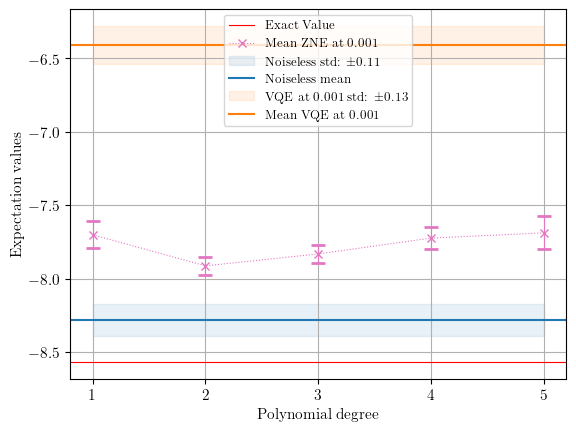

In [7]:
degrees = ["1", "2", "3", "4", "5"]
# Noise
n1 = "0.001"

# Plottin the exact eigen value
plt.axhline(y=q7_exact_val, color = "red", linestyle='-', label='Exact Value', linewidth=0.8)

# Plotting zne mean values at different degrees
plt.plot(degrees, zne_n1_means, marker='x', linestyle='dotted', color = "#e377c2", label=f'Mean ZNE at ${n1}$', linewidth=0.8)
plt.errorbar(degrees, zne_n1_means, zne_n1_std, ecolor="#e377c2", capthick=2, capsize=5, linestyle='none', linewidth=0.8)

# Plotting noiseless VQE values with standard ansatz
plt.fill_between(degrees, q7_noise_off_mean - q7_noise_off_sd, q7_noise_off_mean + q7_noise_off_sd, color="#1f77b4", alpha=0.1, label=f"Noiseless std: ±{q7_noise_off_sd:.2f} ")
plt.axhline(y=q7_noise_off_mean, color="#1f77b4", label=f"Noiseless mean")

# Plotting noisy VQE values with standard ansatz
plt.fill_between(degrees, q7_n1_mean - q7_n1_sd, q7_n1_mean + q7_n1_sd, color="#ff7f0e", alpha=0.1, label=f"VQE at {n1} std: ±{q7_n1_sd:.2f} ")
plt.axhline(y=q7_n1_mean, color="#ff7f0e", label=f"Mean VQE at {n1}")

plt.xlabel('Polynomial degree')
plt.ylabel('Expectation values')
plt.grid(True)
plt.legend(fontsize='small')
plt.show()

In [9]:
"""
Optimized initial param:  [0.29812585363975896, 0.9388397037796031, 2.0716731219657247, 0.9510811562168223, 2.4884571407013802, 1.6206437649582675, 3.5177700214776775, 4.337895929332438, 3.7676785866252955, 4.901243570391332, 4.718934236846715, 5.561387697927436, 5.277105244651737, 5.726980743470803, 5.84174916212867, 5.610390969800182, 6.645269126538842, 6.905031053338224, 6.96830484894176, 9.48445491044951, 8.004040473954275, 9.293333473123914, 8.04069878112782, 9.248493886779624, 7.834303755458313, 9.710310540637266, 8.972733575571443, 9.111799611399276, 9.882308619567633, 9.27361960512304, -0.2681904418955181, -0.37757777082598676, 0.7955756143744629, -0.042209500391655344, 1.083734656732729, -0.19450383508993624, 1.459493663876588, -0.7848864608656776, 2.038552195880673, 0.4593216112325866, 1.422379028159296, 0.42216818971599307, 0.4860773064849094, -1.288415561585463, -0.19706858444345146, 0.5069344027314296, 1.4427566263056288, -0.17109502984016928, 0.40375157483910035, -0.07211998221797597, 0.723286787160681, -0.5980832081288716, 0.4629923532762189, -0.5015752429668221, -1.3142773209041652, 1.150840477225508, 0.2434696488521144, 0.688267929951196, 0.4664687343412789, 0.46991617982409795, -0.027741765924682634, 1.2005993220046514, 0.7854533830087869, -1.6529094208940327, 0.5082445229280308, -0.5665824577241496, 2.1671966368923496, 1.408931157300629, -0.5355287863740105, 0.9857007039861432, -1.7297072427335574, -0.6526956761719902, -0.11107935748351716, -0.13110659837244482, 0.37962952655465043, 0.7890091928785884, 0.5007422869468336, -1.2091083454924834, -0.1870738185110158, 1.808252417026722, -0.4732538943226668, 0.2649939886348114, -0.22896024950069369, -0.22461157180436467, -1.009288383793751, -0.36161782786055574, -1.1144367020914667, 0.09652743493269592, -0.29767905147951584, -0.031137256552958743, -0.43308359127383994, -1.4398574342040704, 0.6810127880730432, -1.1083220648474486, -0.2559460167190097, -1.0600149460822825, -0.4891909666682594, 0.6721410534527908, 0.2952922974069324, -0.7136782529037421, 0.564532590979268, 0.041222335200058254, 0.7266832012799151, 0.9165377893365478, 0.027624105310937785, 0.1424051917196556, 0.5519206621102929, 0.8258658928342736, -0.6325938688725291, -2.5860031417061378, -0.12215367112165838, 0.09292879630270708, -0.5334186886892356, 0.3242424605794658, 0.4889137945476105, -0.9357223915831828, -0.5377710726854362, 0.42801227370805495, 0.12286865418947251, -0.5109370963126542, 0.5668077641436283, -0.6148362077193507, 0.07874667614206866, -0.29933163604579904, -0.5958357648003173, -0.5448319483615516, 1.5951499948738674, 1.3338906251541223, -0.22111623436916097, 0.8595896897775704, -0.8034920465783795, 0.6591494908662131, 1.0051710621580665, 0.7428029711175788, -0.5005446336373147, 0.472269916654537, 0.4583481399203655, 1.1890490509852345, 2.0821455170429473, -0.349950749332912, -0.23936870807231114, 0.06210631520618551, -0.06749166512374509, 0.10181549659307192, 0.1988633926321661, 0.8828749807349515, -1.6221790355453771, 0.6348284827339143, -0.4204575842767778, 0.6870752767036103]
"""
zne_n2_sample1 = [{'degree': 1, 'value': -8.13299263295303}, {'degree': 2, 'value': -8.126616738353466}, {'degree': 3, 'value': -8.144745192067385}, {'degree': 4, 'value': -8.15029698834523}, {'degree': 5, 'value': -8.144112612053771}]

"""
Optimized initial param: [-0.13866156996928988, 0.9908282863994999, 0.9087622422897574, 1.6325098072752575, -0.3033322673703623, 0.9680083649802567, 1.6527710798482012, 2.3640545842959857, 3.1728259862071364, 2.4464135478213884, 2.5775174438442, 1.9677080914414655, 2.3170933832242038, 2.619102166082409, 3.589002395814, 3.13050331911173, 3.954005586278617, 3.8797411385687477, 4.844674270557386, 4.207324546755753, 4.729450232220586, 6.312292794145555, 6.190944615751933, 6.344968686069908, 6.273384463539883, 6.46809174742724, 7.842522735891412, 7.796919067549306, 9.96266754234658, 9.923431685826998, -0.027943113149827274, 0.5560703637075404, -0.3173101824097476, 0.7034432921209272, 0.44378944051492025, 0.019095014061693547, -0.22027770527509008, 0.30711923053003287, -1.131320242033487, 0.7888484382983764, 0.5552218114918037, 0.051992063818609206, 0.9026013357938953, 0.40280770980401, 0.08203370532136317, -1.546725557072397, -0.24816358023471086, -0.08417824960262629, 0.6944487849010742, -0.34250701422315877, 1.2315743150552356, -1.3870505666255184, -0.34610637681552603, 0.48276735779902236, -0.04474750804613216, 0.2259680942907434, 0.9871095228804309, -0.45470622208021255, 0.16028919370719638, 0.7469317432643278, 0.4095072647605231, 0.4966535467238998, 0.9505502407859808, 0.8263627264840981, 0.8017156652763342, -1.7219364019625742, -0.27472018797145314, -0.023410565896545305, -0.3280360553833883, 0.5140756455628827, -0.7188488269761548, -0.8492067315153663, -0.037433549336305987, 0.7233952931559547, 1.2735500740024848, -0.50954287795545, 0.5059983505749842, 0.9512056196288595, -0.4721408574172631, -0.1505915526987779, 0.06939320725366885, 0.4038531149563714, 0.849354815470393, -0.4992902286900536, 0.09728099125101974, 0.7132936858001098, -0.6499472691685301, -0.31680600498580375, 0.8213764199377726, 0.46238837383769404, -0.6709092504993254, -0.3912079202394651, -1.352131746844436, 0.3748640267219222, -0.9717681696939476, -0.018713766557375344, -1.1376774762404336, -0.15450867768819512, 0.41161745870782673, -0.7764407701705501, 0.21907622782825809, -0.11855745956347342, 0.6311661335589224, 0.10508983057679626, -0.1037995634861878, -1.8274393635954287, 1.3012749370528756, 0.5976192652223593, 1.3803843075936633, 0.43378162871331694, -0.7050063581847765, 1.3198833780461268, 0.3889324209696253, -0.9052641873584533, -0.31962138077729135, 0.5506667369253497, 0.3167369662163533, -0.010767092889325846, 0.11262820105908797, 1.4550789179906694, -0.49590160718532983, 0.058880691691262275, -1.677564337071873, -0.8110777992255488, 0.5042076863432747, 0.06305060140951509, -0.07245848995541421, -0.05881389031026646, 0.49848895793867126, -0.48627233088740246, -0.9112413653291259, 0.854145738197787, -1.7917503059957527, -1.3022835962753816, -1.3180658822207332, -0.252107602469591, 1.6220833095887632, -1.063640948387693, 1.120794978252603, 1.2404770611816036, -1.3454680692536254, -0.11400494171376302, 0.764014805600909, 0.04836003549074475, -0.25179863462597657, 0.8581669614218912, 0.6479934298032215, -0.4558830332346157, -0.90224430460148, -0.0026627839721229205]
"""
zne_n2_sample2 = [{'degree': 1, 'value': -8.402961986588636}, {'degree': 2, 'value': -8.39641194870923}, {'degree': 3, 'value': -8.414382223481429}, {'degree': 4, 'value': -8.419487193507813}, {'degree': 5, 'value': -8.413303505686262}]

"""
Optimized initial param:     [0.3546835959206518, 0.7797223480377593, 0.0859191054634935, 1.2125503442408476, 0.8528216345129813, 1.403164173137211, 3.158344395926351, 3.4711931451123257, 3.634167757076211, 3.1581460921900573, 3.706134117527928, 2.741454168751491, 2.7620015983935935, 5.5911870384525555, 5.5393723293445625, 6.513570959547968, 6.5986282690491915, 6.895666508002723, 6.7296751190319215, 8.462950905898092, 6.597457041084801, 8.325670964321546, 6.56639468798161, 8.404677653660988, 6.464210200084198, 8.967536410836022, 7.938701007484968, 9.016530555324895, 7.607967358166812, 9.02132257862464, -0.49537376465841515, 0.7599257723619555, 0.9944145232507343, -0.5641325570394178, 0.43539099301512985, 0.15232594187161497, 0.3327514380044832, -0.033892853413848185, 0.1750419333659688, 0.6868023045526058, 0.8778929940640635, 1.3577903199034236, 0.7113921485374642, -0.1517710596425489, 0.39559877803233806, 1.0860072494343322, -0.3388899775617871, 0.2016545742016995, 0.7071063441163897, 0.03409441762959472, -0.361935487459278, -0.1180307961461225, 0.14662498280756242, -1.0412354982928413, 0.9369656085921013, 0.5062000035538143, 0.35811681941865947, 0.2921986808804457, 1.0314802188694163, 1.2924383072469456, -0.7628114664085027, -0.771049124270116, 0.37854587493035596, 0.26248732759266963, -0.6308360605381707, -0.1183520860514633, 0.8510208672246432, 0.17236896764975684, 1.6636822396632298, 0.5848400648154812, -0.49171780994368464, 0.5471682847551044, 0.1792675815497714, -0.7694495196691183, -0.6653561154289548, -0.018266843586063265, 1.131425018970167, 0.5120759769848912, -0.08190281644551722, 0.5930263991851731, -0.22453830925058002, -0.1857896645895233, 0.311538236210961, -0.10297309091993234, 0.7236734984121208, -1.0082167962361168, -0.6974242620696904, 2.2699752481571096, -0.15389522340560893, 0.13729775871326003, -0.4481851831799418, -0.11018076284166886, 0.04278291971402349, 0.7625999122086337, -0.7845873506153126, 0.9547479046699845, -0.08086447185483346, 0.3656275858855568, 1.478629190670293, 0.07999125949113342, 0.4042186619691816, -0.3275782856709377, 0.6555847556427059, 1.0316403923275066, 0.023390835989974067, -0.26943886190763827, -0.39045760904654264, -0.49904001474997434, -0.5067357644732164, 0.265146163324284, 0.6833409484776388, -0.3668266255317543, 0.6158089262631518, -0.15781013472557864, 0.6811287512291345, -0.7555442562869356, -0.6084684479130481, -1.2740348014640548, 0.9908390236997002, -0.007995332655741016, 0.2185555214971965, 0.3416054841676717, 0.2128170861993158, -0.7768488497097938, 0.5984754721543158, 0.2161377782938202, -0.6492307194936014, -0.11488740051429652, 0.20541689990347084, 0.0931337794033177, 0.7684094921577332, 1.0247956441912942, -0.2241109432497584, 0.2347239995277231, 0.5113204116312077, 0.4255583514668968, 0.232316093120316, 0.42429307396238547, 0.55182802497852, 0.794359359122368, 0.3680417139793915, 1.301145337224138, -0.7391430969497386, 0.3280415274805083, -0.18055153875119034, -0.48475415888289236, -0.15578656708062236, -0.48676849057613314, 0.8913615520261475, 0.6077152679704659]
"""
zne_n2_sample3 = [{'degree': 1, 'value': -8.214754839315875}, {'degree': 2, 'value': -8.208259795339096}, {'degree': 3, 'value': -8.226511569391857}, {'degree': 4, 'value': -8.231906689245582}, {'degree': 5, 'value': -8.22562809756141}]

"""
Optimized initial param:     [-1.1089092434930787, 0.7805284463595337, -0.19042421613201524, 2.5224915411451296, 1.3655871768156453, 1.6143822596570825, 2.1166035794933844, 1.6415581665230587, 2.3432492631519377, 1.284914135056275, 4.27198112153965, 0.8132238961522702, 4.354894221626695, 3.633643357799413, 3.6730494767893225, 3.919586198016852, 3.996027732833635, 6.2501565442873215, 6.12521646891322, 6.9423026559864995, 7.7677225129576115, 7.522745764411147, 8.561063499093684, 8.033799374445236, 8.918493434696659, 7.887327764052667, 8.829716662816088, 8.910347846757503, 8.040141855503435, 9.293282605235145, 0.22775199120490425, 0.42498928668775626, 0.46763390732215254, -1.17037505779886, 0.9252866831681753, 0.790865846495745, 0.022632592850095685, 0.6531833117088144, 0.44244145055657796, -0.5707724450706193, -0.9442902620724783, 0.6925240763254287, -0.01628983606726723, -0.20430073404086743, -1.2300922050889305, -0.43367098705943835, 0.920610772316649, -0.2945501811963439, 0.5673177826495959, -0.10701274379445419, -0.18968109405829753, 1.074075654608859, -1.2245766500930113, -0.031545202529439445, 1.1129696633627706, 0.2344026142171514, -0.8317706374922883, 0.7179240859209997, -0.8838485721655881, 0.39854346058092954, 0.03593645474456338, -0.610820732779724, 0.7941113975039304, 0.06897061266633424, 0.2652507135279184, -0.39195740429199677, 0.835522737713738, 0.8106281346358042, 0.17749265147676133, 0.8028765937650834, 0.6021306832690266, -0.02274205440677151, -0.4276694333326694, -0.5065923927857864, -0.16873843500500157, 0.26660688563633034, 0.011921716161035177, -0.10171885995823815, 0.5329441949406216, 0.32774138519439433, -0.6321268992848483, -0.16052553807177214, -0.601322851920625, -0.18609683350896392, 0.15221368509223843, 0.44583969552817754, -0.7071882288596764, 0.6079605922336712, -1.436078090479919, -0.12867102645771553, -0.3196784622704715, -0.3677308997620969, 0.5386188825444107, 0.5370195439189143, -0.28084418615950024, 0.8185636823796109, -0.16745337597052082, 0.4448607028569657, -0.7192053431079168, -0.0610747427920097, -1.4333843325331512, 0.12808643517812887, 0.7071423448083372, -0.10290371903729988, -0.6602792247990205, -0.04422927618060599, 0.2902020206925935, 1.473128887045116, -0.7532365235534564, 1.3529437527527892, -0.8177162815732195, 0.45087398135902584, -0.7529794413314598, -1.439517108679035, 1.9737121294281315, 0.6132098009059448, -1.4216235892867308, 0.627328065930223, 1.612668590712037, 1.7862873061216284, 0.13385535653811453, -0.9069994596754596, 0.8365422175139403, 0.6034719394197187, -0.10869505602565298, 0.7630932970308356, -0.15585975683036968, 0.14318084055332342, 1.2862616937645128, 0.22965779697734442, -0.09128163810087868, 0.14457187376692637, 0.10438352622997189, 0.5088807325422443, -0.47006127602829917, 0.7966640049988264, 0.31133510457661845, -0.6038123142920753, -0.8129027120341793, -0.26107909706881643, -0.03810684817860461, -0.30476484074563354, 0.4496637718574263, -0.4416302439958478, 0.10596623705405761, -0.0812257037968603, -1.4015367965432646, -0.9974780664358517, -0.11500208349550445, -1.2919796364497165]
"""
zne_n2_sample4 = [{'degree': 1, 'value': -8.413147592543151}, {'degree': 2, 'value': -8.406505627428015}, {'degree': 3, 'value': -8.424837560612517}, {'degree': 4, 'value': -8.430173867985566}, {'degree': 5, 'value': -8.423847816510309}]

"""
Optimized initial param:    [0.5221440513585325, 0.9719009494947218, 1.2026260943213722, 1.7261710077401018, 1.3977649074775624, 1.8734171481235873, 1.2844263724278875, 0.9980462480236119, 1.4256812746522216, 1.6942858446181386, 3.502078733008723, 3.277879524440772, 2.684584399017533, 2.1516668899055342, 2.6352601339932265, 3.98112375484577, 2.562592765568186, 6.0385152639632045, 2.5922976562712674, 4.967131217103643, 3.613442161414042, 5.451930556732759, 3.6104963157511514, 5.800346473360754, 5.5304184208888785, 5.863996985935847, 6.02250605316586, 8.60934911272952, 7.676405269423943, 9.310585890611264, 0.12387921038485283, -0.500256219606032, -0.6232629762428263, 0.862275303407639, -0.06267354691396357, 0.44893168673076916, -0.09412168614016503, -0.6334904167336899, 0.14676891043957707, -0.06950325337628964, 0.20030944295715788, -0.2955241754522802, -0.8079422864806188, 0.20638066591504636, 1.4403891662470496, 0.8299347430711281, 0.2900713844383127, 0.03276707950870298, 0.1891509997655604, -0.39578641614784227, -0.582261019493755, 0.3451458927119698, 0.2368735540566542, 0.15377298845729553, -0.2409925881733933, 0.48377373721319133, -0.40041506959014195, 0.5212435984387667, -0.38350974635670926, -0.7346746188223613, 0.230673610445333, -0.09153606291642583, 0.49711747830064484, -0.10394287938326317, -1.4760411848917248, -0.15660048486209366, 0.4105325833424778, 0.04404438719258935, -0.8462583955370995, 0.04524231368707256, -0.0732980734042836, -0.07054894127354375, 0.5023910847898413, 1.1374268489989656, 0.15723903813205034, 0.3051580189625059, 0.1157590447364474, -1.4314266412533425, 0.5089861525515256, 1.418712187093847, 0.14096686855956947, 0.7077682377570097, -1.0592092259785884, -0.5513102854302155, -1.1634011301439295, 0.15109027016560556, 0.04227348708557779, 0.12151969040963964, -0.5321164587848876, 0.9944516446850585, -0.023922429309318795, 0.5843992331072886, -1.0225264111743346, 0.5199317987200713, 0.3567545043627237, 0.2736371173583628, 0.5364062113191382, -0.09106898939148249, -0.06388031033793211, 0.06104081420887211, -0.023458606867199572, -0.5473398175902697, 0.8099034079908466, -0.5659375601647817, -0.30466606719520256, -0.8881133459411734, 0.8558136219974662, -0.8150784380064098, -0.2541754028134048, 0.6397482847303053, -0.024303993498426463, 1.0112770858990283, 0.36540749246359716, -0.5256970911570148, 0.822745671472027, 0.5201053320788893, -0.48088249822077955, 0.6046691258879481, 0.3797710815936007, 0.2548524662828126, 0.9249815582875042, -0.04130852935742649, -0.8506775238439308, 0.9674733174668204, 1.1293896003602737, -0.22573545767161496, -2.6785177701552363, 0.601858629046526, 0.9058610466294084, 0.44922504914695055, 0.5949218498911537, -0.476790405399975, 0.9825844184223964, 0.06436438499455838, 0.6737650916654567, -0.3208047394075283, -0.2581112519426789, 1.1696347769787343, 0.10827948444877741, 0.7399920890381347, 0.3049993379287639, 0.9138276466955947, 0.5220960816580307, -0.5154596397431285, -0.35784437588717943, -0.4015419981623084, 0.7720235914574047, -0.30688929168631696, 0.9540140440719018, -0.3079770765294564]
"""
zne_n2_sample5 = [{'degree': 1, 'value': -7.999132686550487}, {'degree': 2, 'value': -7.991632360589071}, {'degree': 3, 'value': -8.011717932294102}, {'degree': 4, 'value': -8.019225859813861}, {'degree': 5, 'value': -8.012648029614395}]

"""
Optimized initial param:    [0.4531210692157747, 2.374396907831601, 1.745461590378368, 1.246462404853609, 2.2345783995310438, 1.890262863911008, 2.7185869886674805, 1.2855734386981208, 3.708609185610203, 2.3153637477086884, 3.4829015690750564, 3.1667045921294066, 3.7246835274921386, 4.521890271674163, 5.1351000773244415, 4.603606373540196, 6.8251955293026665, 7.031284509352465, 6.979485990885576, 9.547192517402847, 8.904581082722522, 9.21065337436854, 8.49580325694314, 8.65340391668873, 9.696362075698934, 8.675029677934916, 9.67627866994326, 8.99210903736074, 9.783040111874245, 9.393053016924295, 0.9290984810969373, -0.027162017058415935, -0.4124611429778049, 0.08860842375280752, -0.6102643853048942, -0.4901305424056922, -0.3294472182660288, -0.765568383579532, -0.7557288014733051, 0.4398975096334545, 1.0794313762076364, -0.3688648324747875, -0.10009580287681284, -0.16112387962654584, -0.9545693286537895, 0.8884028150996183, -0.4336479179088282, 0.6779866024155448, 0.30641235508045045, -0.2989528491773763, -0.13631596589997796, 0.14979284962169334, 0.10596373400698433, 0.9287207061365381, -0.3464489875213427, 0.047383612198382136, 0.7769017293933427, 0.2881557200725753, -0.28517546188464027, -0.21231390688417637, 0.5329733892585349, -0.9868468281737228, 1.1161517938803132, 0.554260663370557, 0.3992886289759819, 0.7261754310042737, -0.434061166555555, 0.021373719309644816, 0.1401655039243323, -0.19486871211515844, 0.4820992117495463, -0.7118184887651151, -0.38350379465650974, -1.3229105447933998, 0.0017877364977966145, 0.07722723949195766, 0.7376637943735068, -0.06844001766617032, 0.8239380246002972, -0.3467540471972906, 0.3016116450113182, 0.17540272189087747, 0.4450785344368583, 0.6958229650643271, 1.076955870707028, 1.4690867284169793, -1.7668710555346265, 0.569961884574158, 0.5154309809885607, -1.0832071256665916, -0.4947209507962312, -0.15350337959189966, -0.686720893216332, 0.10878716952810388, 0.32603500650739603, 0.04801251419408979, 0.031652664555619804, -0.2876141843911741, 0.6395546689968234, 0.2461169339660957, 1.9213005899062523, 0.09348643721671922, 0.22018228353762462, 1.7267209820686804, 0.1209040236832968, 1.6422718221740835, 0.5981743476679766, -0.4190326534092831, -0.0988132681076002, 0.6597242134684574, 0.2348602847613872, 0.5370029473374573, 0.9739290557443083, -1.3022592139155065, -0.9455719027482343, 0.8400238614784554, 0.7359510406401861, -0.07921012709020309, 0.16576167637222597, -0.28999824098695043, 0.23610341553810898, 0.2577778063238303, -1.0210121933387482, -0.7644613736812624, 0.699184067919341, -0.44995178936881525, 0.8911355702926808, 0.19622383076258454, 0.37690088182534065, -0.7433687678039939, 2.4568887312067456, 0.7578947878769512, -1.1303115550849707, 0.11649252985850908, -0.9081747189119301, 0.4553689940286986, -0.5762441293271948, -0.07988466920810525, 0.01645926902022273, -0.0511579331783702, 0.9551517787121935, 2.1040481396949873, 0.5736878417652068, 0.10900985439505595, 0.47515796199118765, -1.8123090153663248, 0.31841739469590036, -0.16823641579919696, 0.8033222027060644, -0.2784234639233414] 
"""
zne_n2_sample6 = [{'degree': 1, 'value': -8.308151739655816}, {'degree': 2, 'value': -8.301992614142305}, {'degree': 3, 'value': -8.319418636907661}, {'degree': 4, 'value': -8.32387472036761}, {'degree': 5, 'value': -8.317715009966056}]

"""
Optimized initial param:  [0.7513922696673864, 0.7239647918686194, 1.3075879574415255, 1.536561182494814, 2.7308314837376497, 2.8307441200610266, 3.7731313653572633, 3.0385364021515784, 5.02084186742868, 3.5855883102008623, 5.225881708522112, 3.6500833534270707, 5.2860209392893935, 3.9401743586961184, 5.084818354163392, 4.405374985105519, 4.640493447376471, 7.988360011840663, 7.516392909556241, 8.916651303329244, 7.709815042112016, 8.82753483193864, 8.038308092588586, 7.990490781390236, 8.813701237689031, 8.08961611510911, 8.609660185428229, 9.07017788193378, 9.906937320274757, 9.863284696445417, 0.21218021531468065, 0.6069184121681784, 0.5284958375630625, 0.2548157631795276, 0.1400434794348839, 0.49380146275148185, -0.14035722984026622, 0.1531134246662286, 0.1810317340566477, 0.666659761027054, 1.4192648609766956, -0.7530563748549298, -0.19077374692725538, 0.825389736718958, -0.2011347999179099, -0.36111727190918586, -0.06523075735137203, 0.4213100383231715, 0.16757232158594507, -0.7513883894067165, -0.3764858329672453, 0.036264037256962485, 0.18692858696824743, -0.7460232860099258, -0.9555979317906201, 0.8588815911772384, -0.9094867450505991, -0.503605897486737, 0.7013228294018751, 0.6047441067335945, -0.7332317030541241, 0.6037670686350487, -0.2342053144955019, -0.20545596362539487, -0.437423724014188, 0.6163650987667989, -0.2186658848659329, -0.2591001860566112, -0.18885093266445596, 0.3907992775486116, -0.30735149986609134, -0.07919721515231581, -0.545112313068689, -0.33067075101638504, -0.19472490606455722, 0.8651889383945381, -0.40146654404344145, 0.1913827054154904, 1.1634935128181527, 0.37107025843191827, 0.05039964128543494, 0.257921255558446, -1.152816639694718, -0.30407481057348273, 0.037347770038614066, -0.1676356757441358, 0.032157994976500334, -0.18950386319137935, -0.27960076034794423, -1.1186830850851972, 0.08191119496070845, -0.6289334053593842, 0.21109625027153736, -0.0641396360151336, 1.489665000038184, -0.6711657535473539, 0.32439223814601015, -0.25440156806664127, 0.952138252820196, 0.7384524293552654, -0.11469568158310126, 0.023664431994579578, -0.13478583558411586, 1.4012396225626598, 0.6683626532455907, -0.15852774965824154, 0.9462501510199652, -0.9013273815420781, 0.07833868312298198, 0.11028726535641502, 0.16243530829171904, -1.0556221035119944, -0.790877538779458, 0.18157258594258863, 0.2874807145825073, 0.5476190496319602, -0.8212678852871007, -0.9340946320611491, 0.6763797260252499, 0.9932527152259069, -0.3573646062003013, -0.22058851157659728, -0.0031081417444601403, -0.45408514506616865, -0.8388045840209666, 0.34671714943376714, -1.0182507494084903, 0.5285672693368967, 0.7396541787671753, 0.5240662887283576, -0.4477396576626629, 0.020780077673289533, -0.00373674893439839, 1.1864443521738526, 0.13170355150784266, -0.9696629383444558, 0.12171313753558831, 0.6399995614096127, -0.15489936673482624, 0.5385166596485962, 1.2516887813500537, 0.4507172834094367, 1.5638866318866398, 0.051655644924795206, 1.28369619904977, -1.5099347127936178, 0.49556594650981234, 1.0762336279615146, 1.1337171731352031, -0.07935233756245191]
"""
zne_n2_sample7 = [{'degree': 1, 'value': -8.425610122150236}, {'degree': 2, 'value': -8.418414402585979}, {'degree': 3, 'value': -8.437780154112332}, {'degree': 4, 'value': -8.443952122240278}, {'degree': 5, 'value': -8.437368563227372}]

"""
Optimized initial param:    [0.9619998447592982, 2.019931336942897, 0.7555459058181022, 1.813935249900877, 1.4250758282380815, 2.3174763851116005, 2.142104969185399, 3.2387377100509274, 2.6911331009343873, 2.7656500390660024, 5.844594012747985, 5.428620071968981, 4.871466332395974, 4.937097929684759, 5.815155829880022, 5.778942555671392, 7.580559739135412, 6.21693820806486, 7.893301237206074, 6.605126792784429, 8.030322365188544, 6.879504454214082, 7.736005260682808, 7.263597424811359, 8.343219150024925, 8.113569784536422, 9.205316561813943, 10.182155400910661, 10.128242899448336, 9.371132568750845, 0.22635393327081363, -0.9842855344333115, 0.8274388490668783, 0.45395167512350443, 1.181175915493305, -0.021909888234121565, 0.4850989897650438, -1.1898281439352139, -0.6735676558682752, 0.7114542586041209, 0.8231643821804978, -0.38058858055642625, -0.45131697620576433, 0.4637116449145521, 0.6323538614714252, -0.8597115695552544, -0.47775539437186915, 1.1898313502034892, 1.3799193098443712, 1.9304956595256741, 1.1508800818241092, -0.2728822963838408, -0.04331310782114141, 0.5925351587493755, 0.8680813681166349, 0.1227687465874534, 0.5455402393600318, -0.10988623813797138, 0.5821408043092591, -0.8327490547194816, 0.41582454933237945, 1.2077238757976738, 0.38786904645532344, 0.010924852928587553, -1.0817998278480414, -0.4014761763773073, 0.6005233930355784, -0.5452350776193031, 0.6322660998846581, 0.6209790310076236, 0.5570314847867848, 0.5767916552524783, -0.30832588990000814, -0.1985128059033317, -0.2645429293891527, -0.10762253552952629, -1.0436352707859733, -0.003453578834737344, 0.7881245486047127, 0.0695902200312104, -0.023016287459255543, 0.24014640754273084, 0.5378578315100225, 0.26676318641306773, 0.9048132703070431, 0.14306105757086837, 0.23245653038009473, -0.4087499812932469, -0.35501879488084265, 0.23766834690447117, 0.6387622138511683, -0.40234703939864924, 0.7569379857240663, 0.6070906522411949, 0.5984672782312006, 0.5775465800782779, 1.2747492132338902, 0.20277593981909003, -0.3960684928843878, -0.1750189769835364, 0.22008173355657187, -0.49467109761052525, 0.3311974815855802, 0.511109494403056, 0.14970490790232302, 0.6161982865947976, -0.4201329365349069, -0.08771731902787706, -0.5929056106180194, -0.5174794073404573, -0.09237951801537629, -0.1336394882314039, -0.3202357693319797, 0.10143358093914308, -0.07774628297970812, -0.9063861594149183, -0.4636873418020958, 0.3590376878838044, -0.16442907623470476, -1.1419526048386677, -0.4659234404591381, 0.4033456087320432, -0.5229198481991518, -0.227227441370957, 1.113389263428329, -0.02113767260132813, -0.15382501045090166, 0.6192994268058905, -0.5418605691003818, 0.7113386433270088, 0.01470793112654695, -1.2730586198759868, -0.21985005759576015, 0.2663045934893659, 0.4929785624202518, 0.06749608235530465, 0.5398270188057815, 0.2985270898043076, 0.04006957513537612, 0.046724293300811334, 0.5366392519097296, -0.0251496256742593, -0.5574648732343429, 0.5711508590746502, -0.058323427571351005, -0.07822642988475761, 2.179050901809526, 0.640424445960611, 0.9826825030412834, -0.07730308365389016]
"""
zne_n2_sample8 = [{'degree': 1, 'value': -8.348746565128051}, {'degree': 2, 'value': -8.34182600341722}, {'degree': 3, 'value': -8.36096232131482}, {'degree': 4, 'value': -8.366905349311267}, {'degree': 5, 'value': -8.360354641051847}]

"""
Optimized initial param:    [-0.1327423235681605, 0.914714965750256, -0.96583411177959, 1.7310130444968024, -0.14655897130329534, 2.567738644223863, -0.3806798240154814, 1.9733265403040814, 2.3666482599898755, 2.0224806846263776, 4.646365164590962, 2.149198641645919, 5.606491606833342, 3.1693868790539423, 5.789780431898635, 5.492181351128803, 4.549499275278878, 7.994928844248228, 6.0227232857931945, 7.444589368217794, 6.902626540379865, 6.13347444070377, 9.588510395713204, 6.50679256829609, 9.997230974260745, 7.403136813697753, 9.019217305031349, 8.293774800902758, 8.025792537997699, 10.144319547894224, 0.2690839791920444, 0.10721535400433899, 1.6267436038468577, 0.18364433433959182, -0.16354212808346644, 0.4865603801928184, 0.3573585128300933, -0.3002685335666377, 1.3576750903475872, 0.6171614452327491, 0.8307361936503359, 0.17489445780802187, 0.1377793026526511, 0.890910137899147, 0.21599122404570908, 1.2129358848514065, 0.9427114814167539, 0.2832994816248265, -0.23791124970425206, 0.32750074943624724, 0.15207240214910947, 0.4833070972147533, 0.3455910720866005, 1.0045625856322706, 0.01019455869748425, 0.48204421701477645, 0.6390853431367923, -0.006781807634416312, -1.0999133218645123, 0.1207299041035774, 0.4237779086789235, 0.5576673767734251, 0.5382870686122183, -0.0858846376364491, -0.27787193674749405, 0.1770235814090633, -0.7248897775730453, 0.38879225100256515, 0.17075766850886986, -0.1004191678979967, 0.645914192554372, 0.24789811438286222, -0.3183355834314263, 0.8766269922719343, 0.9194952526488679, -0.06339081052180741, -0.40437927027432236, -0.30050409442459963, -0.8567283080412991, -1.086082059352685, -0.12172386199577824, -0.21747385173521191, 0.4659654188190389, 0.15328702925681081, -0.12759155526158905, -0.23451848406999132, -1.0502275263950138, 0.47521731643589876, 0.13470619876454443, -0.6917080587171478, 0.7924803985792772, 1.266880967683574, 0.3899984776378894, 0.09533687691681371, -0.9752202826718499, -0.013229608992513702, 0.39187864044258086, -0.4935186283350479, 0.571738747906797, 0.694346059839836, -0.885040661691875, -1.080459876994749, -0.4537051602357153, -0.3357445896057819, -0.22716726285203281, -0.542365227985102, -0.6018711780536115, 0.6564210714992685, -1.4725887470579295, -0.40603870180411095, 1.6240420319915632, 0.5488342244537384, -1.8097011066221667, 1.1968833523580258, -0.12739612722604082, 0.7969550441339267, -0.33702641567291997, 0.035423932124014464, 0.8047875250761278, 0.22737423966119116, 0.1212638634044944, 0.38328275802853934, 0.37173471793214924, -0.12927780225516308, 0.3073696964348078, 0.27751220172433827, 1.0404945356946111, -0.10116451374484772, -0.05681490980055183, -0.6221059268862108, 1.1715362113046226, -0.5335490558452498, 0.5818378235543943, -0.6620829111600726, 0.4050561721739973, -0.6705820912561923, 0.6661730680026674, -1.0459651194561181, 0.7261405788182108, 0.17957995737591023, 0.8934443103130744, 0.37010952419424037, 0.19915768702436734, -0.4730190615698548, 1.8970294843225142, -0.4523190029344272, 0.18272896521524723, 0.9892961895201193, 0.5470724789522468, -0.7653970036418047]
"""
zne_n2_sample9 = [{'degree': 1, 'value': -8.0733784717948}, {'degree': 2, 'value': -8.065391979025751}, {'degree': 3, 'value': -8.0870370964673}, {'degree': 4, 'value': -8.095517503250353}, {'degree': 5, 'value': -8.088410340517711}]

"""
Optimized initial param:    [-0.27391884874272526, 0.0884104863976336, 2.8407612290438373, 2.6255258552762286, 3.99989647928874, 3.809389155335292, 3.461871838501106, 5.323098348279782, 4.535557027713248, 4.600167633871529, 4.617559271719438, 5.1785731874302225, 4.817423312529665, 5.972833610808338, 5.1921240813840175, 5.259114577354369, 5.496313869244562, 5.169410906048823, 6.385992351350598, 6.494704638241259, 6.346373036483911, 8.852279790038983, 7.572145315839959, 9.21596944510609, 8.046691447162583, 9.255018353057954, 7.634063807024842, 9.94722012834277, 9.84686920568233, 9.075389311078615, -0.20260715848701688, 0.6992527904413549, -0.5264056190181338, 1.0895459602659219, 0.08636737512449584, -0.4644170043995339, 0.19218312746937471, -0.1445858164181411, 1.0627442277567258, 0.22592348985115432, 1.1931595613388668, 0.6821339323120845, -0.07260914019025763, -0.4070032287273207, 0.3981526820452756, 0.026680905019762453, -0.6575591860989153, 1.8174285244564807, -0.004405320797570146, 0.8775222614434592, 0.37659049726146604, 0.8793272869609905, -0.8010242433686399, -0.17848351419942712, 0.9612974027178975, -0.37080385068668226, -0.6456912308096691, 0.516110872023138, -0.03345473226037957, 0.5086465187458856, 0.40300175044215175, -0.32898322292475024, 0.7259249929220292, -0.8194330211957399, 0.13077776281997627, -0.6426476749829003, 0.3837175323203611, 1.6335730773258346, -0.17651247187017585, 0.2794083145184556, 0.6327720924350426, 0.45805869744069383, 0.07320368501230372, 1.0986438605234923, 1.3897304817099159, -0.73140188565077, 0.24145394527289055, -0.2566793737559017, -0.7976415873961021, 0.4510251410020487, 0.45126360038443847, 0.35664535654643703, 0.13971057019352814, -0.7987267249782124, -0.7328732074360736, 0.8999893595572179, 0.14911621802855882, 0.4597392535570175, 1.1555791216145719, -0.5640515564575537, -1.1305575155814018, -0.3039297288590601, -0.20507379228852157, 0.4282133341984991, 0.1087563550241245, 0.8931748745705422, -0.3167106654152249, 0.588293557057191, 0.4704054179268384, -0.045145714641451194, 0.10800960877498511, -0.43708638278199335, -0.4119158004839028, -1.0599799176778224, 0.07389141296805832, -0.5116941203084504, -0.33841449305817456, 0.21016475095942205, -0.7007481879958348, -0.1040333183718623, -1.4700417642966366, 0.07715567633286721, 0.0067645316938415075, 0.29587107704733384, -0.05083050199176995, -0.2119567779754233, -1.3764294837931281, 0.3237982703862626, 1.0419564163054058, -0.12126017870104233, -1.0777578170611688, -0.2865008367674303, 0.25354537370034735, 0.12509652606889218, -0.28267928310444623, -0.8821250613402521, -0.1597996240033874, -0.7940874369901179, -1.6618203315146816, -0.47751501583475486, 1.1138082446376538, -0.08477800046657447, 0.4252314905868975, 0.06114462902696846, -0.06376285460377276, 0.7324525001281688, -0.007731990721942791, 1.0037135000830184, 1.1022530150616345, 0.16710036548601817, 0.8080236000814325, 0.7298481166372375, -0.06981718714836807, 0.66545179023266, 0.3290527534198197, 0.20161623060803013, -0.2927517145770375, 0.46403714133482443, 0.22538850300784674, 1.379432589952678]
"""
zne_n2_sample10 = [{'degree': 1, 'value': -8.26783748195675}, {'degree': 2, 'value': -8.260571883316487}, {'degree': 3, 'value': -8.280242962326373}, {'degree': 4, 'value': -8.28682320480064}, {'degree': 5, 'value': -8.28020294695729}]

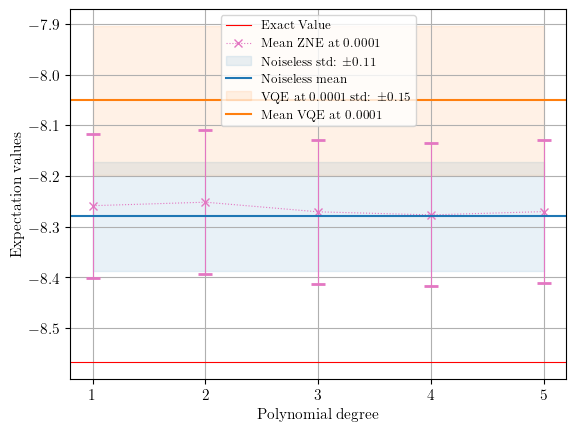

In [11]:
# Noisy standard VQE
q7_n2_vals = [-7.930310190255489, -8.203754972567195, -8.0130509533157, -8.210385024706664, -7.785254186802164, -8.112245381310693, -8.215046679708708, -8.139267875840034, -7.844984628233339, -8.055470527448735]
q7_n2_mean = np.mean(q7_n2_vals)
q7_n2_sd = np.std(q7_n2_vals)


# Aggregate all lists into one
zne_n2_all = [zne_n2_sample1, zne_n2_sample2, zne_n2_sample3, zne_n2_sample4, zne_n2_sample5, zne_n2_sample6, zne_n2_sample7, zne_n2_sample8, zne_n2_sample9, zne_n2_sample10]

zne_n2_d1 = []
zne_n2_d2 = []
zne_n2_d3 = []
zne_n2_d4 = []
zne_n2_d5 = []
for sample in zne_n2_all:
    zne_n2_d1.append(sample[0]["value"])
    zne_n2_d2.append(sample[1]["value"])
    zne_n2_d3.append(sample[2]["value"])
    zne_n2_d4.append(sample[3]["value"])
    zne_n2_d5.append(sample[4]["value"])

zne_n2_means = [
    np.mean(zne_n2_d1),
    np.mean(zne_n2_d2),
    np.mean(zne_n2_d3),
    np.mean(zne_n2_d4),
    np.mean(zne_n2_d5)
]

zne_n2_std = [
    np.std(zne_n2_d1),
    np.std(zne_n2_d2),
    np.std(zne_n2_d3),
    np.std(zne_n2_d4),
    np.std(zne_n2_d5),
]

degrees = ["1", "2", "3", "4", "5"]
# Noise
n2 = "0.0001"

# Plottin the exact eigen value
plt.axhline(y=q7_exact_val, color = "red", linestyle='-', label='Exact Value', linewidth=0.8)

# Plotting zne mean values at different degrees
plt.plot(degrees, zne_n2_means, marker='x', linestyle='dotted', color = "#e377c2", label=f'Mean ZNE at ${n2}$', linewidth=0.8)
plt.errorbar(degrees, zne_n2_means, zne_n2_std, ecolor="#e377c2", capthick=2, capsize=5, linestyle='none', linewidth=0.8)

# Plotting noiseless VQE values with standard ansatz
plt.fill_between(degrees, q7_noise_off_mean - q7_noise_off_sd, q7_noise_off_mean + q7_noise_off_sd, color="#1f77b4", alpha=0.1, label=f"Noiseless std: ±{q7_noise_off_sd:.2f} ")
plt.axhline(y=q7_noise_off_mean, color="#1f77b4", label=f"Noiseless mean")

# Plotting noisy VQE values with standard ansatz
plt.fill_between(degrees, q7_n2_mean - q7_n2_sd, q7_n2_mean + q7_n2_sd, color="#ff7f0e", alpha=0.1, label=f"VQE at {n2} std: ±{q7_n2_sd:.2f} ")
plt.axhline(y=q7_n2_mean, color="#ff7f0e", label=f"Mean VQE at {n2}")

plt.xlabel('Polynomial degree')
plt.ylabel('Expectation values')
plt.grid(True)
plt.legend(fontsize='small')
plt.show()

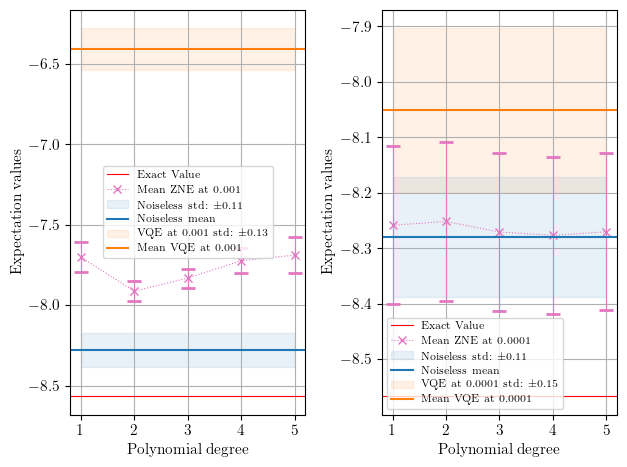

In [15]:
# Create figure and axes for subplots
fig, (ax1, ax2) = plt.subplots(1, 2)

# Plottin the exact eigen value
ax1.axhline(y=q7_exact_val, color = "red", linestyle='-', label='Exact Value', linewidth=0.8)

# Plotting zne mean values at different degrees
ax1.plot(degrees, zne_n1_means, marker='x', linestyle='dotted', color = "#e377c2", label=f'Mean ZNE at ${n1}$', linewidth=0.8)
ax1.errorbar(degrees, zne_n1_means, zne_n1_std, ecolor="#e377c2", capthick=2, capsize=5, linestyle='none', linewidth=0.8)

# Plotting noiseless VQE values with standard ansatz
ax1.fill_between(degrees, q7_noise_off_mean - q7_noise_off_sd, q7_noise_off_mean + q7_noise_off_sd, color="#1f77b4", alpha=0.1, label=f"Noiseless std: ±{q7_noise_off_sd:.2f} ")
ax1.axhline(y=q7_noise_off_mean, color="#1f77b4", label=f"Noiseless mean")

# Plotting noisy VQE values with standard ansatz
ax1.fill_between(degrees, q7_n1_mean - q7_n1_sd, q7_n1_mean + q7_n1_sd, color="#ff7f0e", alpha=0.1, label=f"VQE at {n1} std: ±{q7_n1_sd:.2f} ")
ax1.axhline(y=q7_n1_mean, color="#ff7f0e", label=f"Mean VQE at {n1}")

ax1.set_xlabel('Polynomial degree')
ax1.set_ylabel('Expectation values')
ax1.grid(True)
ax1.legend(fontsize='x-small')

# Plottin the exact eigen value
ax2.axhline(y=q7_exact_val, color = "red", linestyle='-', label='Exact Value', linewidth=0.8)

# Plotting zne mean values at different degrees
ax2.plot(degrees, zne_n2_means, marker='x', linestyle='dotted', color = "#e377c2", label=f'Mean ZNE at ${n2}$', linewidth=0.8)
ax2.errorbar(degrees, zne_n2_means, zne_n2_std, ecolor="#e377c2", capthick=2, capsize=5, linestyle='none', linewidth=0.8)

# Plotting noiseless VQE values with standard ansatz
ax2.fill_between(degrees, q7_noise_off_mean - q7_noise_off_sd, q7_noise_off_mean + q7_noise_off_sd, color="#1f77b4", alpha=0.1, label=f"Noiseless std: ±{q7_noise_off_sd:.2f} ")
ax2.axhline(y=q7_noise_off_mean, color="#1f77b4", label=f"Noiseless mean")

# Plotting noisy VQE values with standard ansatz
ax2.fill_between(degrees, q7_n2_mean - q7_n2_sd, q7_n2_mean + q7_n2_sd, color="#ff7f0e", alpha=0.1, label=f"VQE at {n2} std: ±{q7_n2_sd:.2f} ")
ax2.axhline(y=q7_n2_mean, color="#ff7f0e", label=f"Mean VQE at {n2}")

ax2.set_xlabel('Polynomial degree')
ax2.set_ylabel('Expectation values')
ax2.grid(True)
ax2.legend(fontsize='x-small')

plt.tight_layout()
plt.savefig('transverse_result_300dpi_N1N2.png', dpi=300)
plt.savefig('result.svg', format='svg')
plt.show()